# Logistic Regression using Keras:

In this tutorial we will be implementing the problem using keras. Keras is a modern library built on tensorflow which will allow us to implement our perceptron in just a very few lines of code. We'll create the model for the same dataset which we generated in 'Logistic Regression from scratch' tutorial.

In [1]:
import numpy as np
import keras

#A sequential is a linear sack of layers.
#Neural networks basically are organised in layers containing inter-connected nodes.
#In a perceptron model we have 2 layers: the input layer and the output layer.
from keras.models import Sequential

#In a dense class every node in the layer is connected to every node in the preceding layer
from keras.layers import Dense

'''
Batch gradient descent (vanilla gradient descent) is a computationally expensive technique as we read all the samples into
the computer's memory at once. Stochastic gradient descent however computes the gradient through a single sample.
The Adam optimizer is a combination of two extensions of Stochastic Gradient Descent: Adagrad & RMSProp.
In stochastic gradient descent we need to keep a fixed learning rate. This learning rate should neither be too small nor
it should be too large
The Adam optimizer computes an optimized learning rate for each parameter.
In practice Adam is recommended currently for the default algorithm to be used.
'''
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


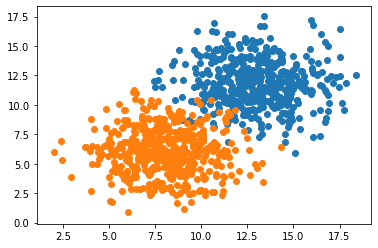

In [4]:
#generating the dataset as we did in the last section, the only difference being we will be using 1000 points this time
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
              np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
              np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

### Defining the perceptron model:

In [7]:
model = Sequential()
#adding a single perceptron layer to our model
#units: no of outputs
model.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))

adam = Adam(lr = 0.1)
model.compile(adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

#verbose: will print the result at the end of each epoch. If verbose is set to 0 it won't print anything.
#batch_size: since our data point contains 1000 points this would result in 20 batches.
#epochs: this specifies the number of times the model will go over the entire dataset to train.
#      : the epoch value should not be too large as this would lead to overfitting.
#      : in this case we are using a epoch value of 500 even though we won't need over 10 epochs as this is logistic regression
#the below function returns a history object which keeps an account of the loss and accuracy at each epoch
h = model.fit(x = X, y = y, verbose = 1, batch_size = 50, epochs = 500, shuffle = 1)

Epoch 1/500
1000/1000 [==============================] - 0s 90us/step - loss: 1.0567 - accuracy: 0.4730
Epoch 2/500
1000/1000 [==============================] - 0s 19us/step - loss: 0.5242 - accuracy: 0.7750
Epoch 3/500
1000/1000 [==============================] - 0s 17us/step - loss: 0.3827 - accuracy: 0.8960
Epoch 4/500
1000/1000 [==============================] - 0s 17us/step - loss: 0.3308 - accuracy: 0.9070
Epoch 5/500
1000/1000 [==============================] - 0s 17us/step - loss: 0.2885 - accuracy: 0.9310
Epoch 6/500
1000/1000 [==============================] - 0s 17us/step - loss: 0.2539 - accuracy: 0.9470
Epoch 7/500
1000/1000 [==============================] - 0s 16us/step - loss: 0.2314 - accuracy: 0.9530
Epoch 8/500
1000/1000 [==============================] - 0s 18us/step - loss: 0.2072 - accuracy: 0.9630
Epoch 9/500
1000/1000 [==============================] - 0s 16us/step - loss: 0.1951 - accuracy: 0.9670
Epoch 10/500
1000/1000 [==============================] - 0s 16u

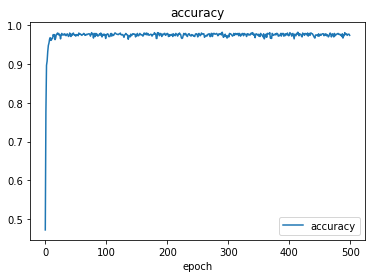

In [9]:
#plotting the accuracy from the history object
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

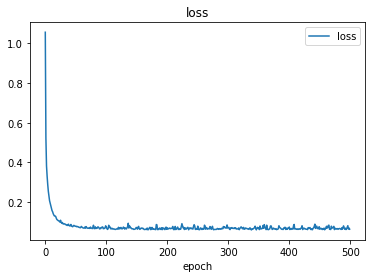

In [10]:
#plotting the loss from the history object
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [13]:
def plot_decision_boundary(X, y, model):
    #defining a grid of 50*50 equally spaced points with a tolerance of 1
    #linspace has a default value of 50, which means it will generate 50 points
    x_span = np.linspace(min(X[:, 0]-1), max(X[:, 0])+1)
    y_span = np.linspace(min(X[:, 1])-1, max(X[:, 1])+1)
    #meshgrid converts a vector of 50 values into a matrix of 50*50 repititive values along the axis 0 and 1
    xx, yy = np.meshgrid(x_span, y_span)
    #converting the 2-dimensional matrix into 1-dimensional vector
    xx_, yy_ = xx.ravel(), yy.ravel()
    #combining the values in a column-wise manner
    #what this does is against every x value there will be 50 y values
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

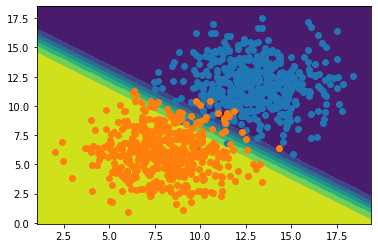

In [15]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])
#the plot below shows the contours of probability distribution.
#blue represents the probability close to 0
#green represents the probability close to 1

prediction is: [[0.9999795]]


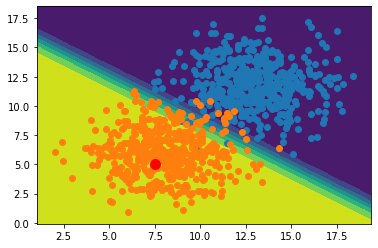

In [17]:
#predicting the probability of a random point
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

#defining the random point
x = 7.5
y = 5.0

point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot(x, y, marker = 'o', markersize = 10, color = "red")
print("prediction is:", prediction)